### This is a study on data collected during a each batch of XRF runs

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [220]:
df = pd.read_excel('data/crm.xlsx', parse_dates=['DT'])
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","dt","xrf"]
df = df.set_index('dt')

In [221]:
df['year'] = df.index.year
df['hour'] = df.index.hour
df['date'] = df.index.date

In [202]:
df.head()

,sample,ni,fe,co,alu,sil,phos,sul,mag,cal,chrom,man,ti,xrf,year,hour,date
dt,,,,,,,,,,,,,,,,,
2021-06-06 03:50:24.000,S1,0.6344,48.71,0.0981,10.25,2.032,< 0.0012,0.1668,0.741,NaN,NaN,NaN,NaN,3,2021,3,2021-06-06
2021-06-06 09:21:36.000,S1,0.6342,49.41,0.1048,10.47,2.159,< 0.0012,0.1652,0.854,NaN,NaN,NaN,NaN,3,2021,9,2021-06-06
2021-06-06 14:09:36.000,S1,0.6303,48.10,0.107,10.17,1.811,0.00949,0.1613,1.001,NaN,NaN,NaN,NaN,2,2021,14,2021-06-06
2021-06-06 16:17:36.960,S1,0.6191,48.43,0.12,10.19,1.816,0.00955,0.1634,1.056,NaN,NaN,NaN,NaN,2,2021,16,2021-06-06
2021-06-06 16:19:12.000,S1,0.6384,48.03,0.112,10.46,1.667,0.00754,0.1667,0.923,NaN,NaN,NaN,NaN,2,2021,16,2021-06-06


In [30]:
elements = ['ni','fe', 'alu']
crm = df.groupby(['xrf','sample'])[elements].resample('D').mean().dropna(how='all').round(2).reset_index().set_index('dt').sort_index()
crm['year'] = crm.index.year
'''crm_daily.to_csv("data/daily_crm.csv")'''
crm.head()

,xrf,sample,ni,fe,alu,year
dt,,,,,,
2021-06-06,2,S1,0.63,48.21,10.35,2021
2021-06-06,3,S2,0.69,52.17,7.38,2021
2021-06-06,3,S1,0.64,49.09,10.77,2021
2021-06-06,2,S2,0.66,50.95,6.88,2021
2021-06-30,2,S1,0.64,48.96,10.66,2021


In [40]:
#subset and make a csv file for use in the 2023 QC Program
crm22 = crm[crm.year==2022].drop('year',axis=1)
crm22.to_csv('data/crm2022.csv')

# 2022 CRM SUMMARY

In [44]:
crm_22_summary = crm22.groupby(['sample','xrf'])['ni','fe', 'alu'].agg(['count', 'max','min', np.mean,np.median, np.std]).round(2).reset_index()
crm_22_summary.to_csv('data/summary_crm22.csv')

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_4912/2398525334.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crm_22_summary = crm22.groupby(['sample','xrf'])['ni','fe', 'alu'].agg(['count', 'max','min', np.mean,np.median, np.std]).round(2).reset_index()


In [203]:
#full data for 2022
df22 = df[df['year']==2022]
df22_new = df22.groupby(['hour','date'])['ni'].nunique()
df22_new = df22_new.reset_index(name='count')
df22_new.loc[df22_new['count']>18,'count'] = 18

## CRM Usage over Months

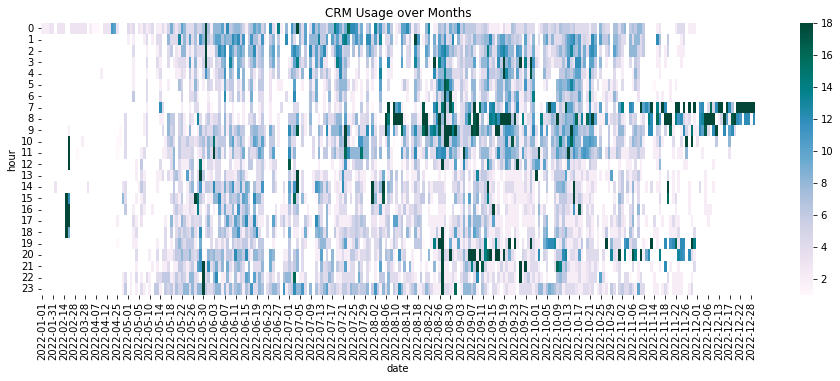

In [160]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_new.pivot('hour','date','count'),annot=False, cmap="PuBuGn")
plt.title('CRM Usage over Months');

## CRM Usage over Months reduced

In [172]:
df22_new = df22.groupby(['hour','date'])['ni'].nunique()
df22_new = df22_new.reset_index(name='count')
df22_new.loc[df22_new['count']>9,'count'] = 0 #exclude most instances of run requests using crm only

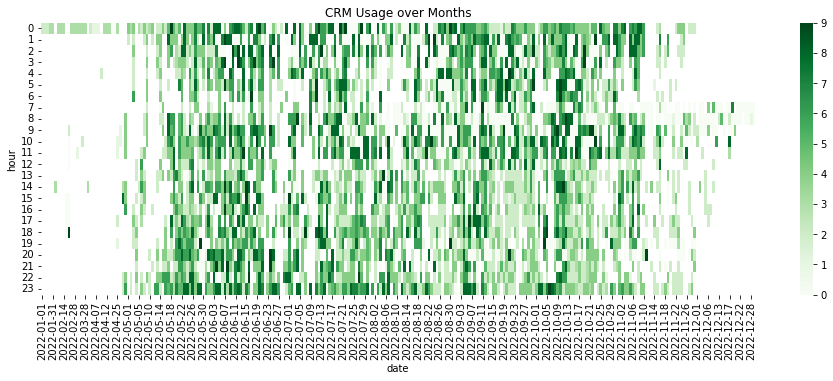

In [173]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_new.pivot('hour','date','count'),annot=False, cmap="Greens")
plt.title('CRM Usage over Months');

## XRF Usage over Months

In [186]:
df22_xrf = df22.groupby(['hour','date'])['xrf'].nunique()
df22_xrf = df22_xrf.reset_index(name='count')
#df22_xrf.loc[df22_xrf['count']>9,'count'] = 0

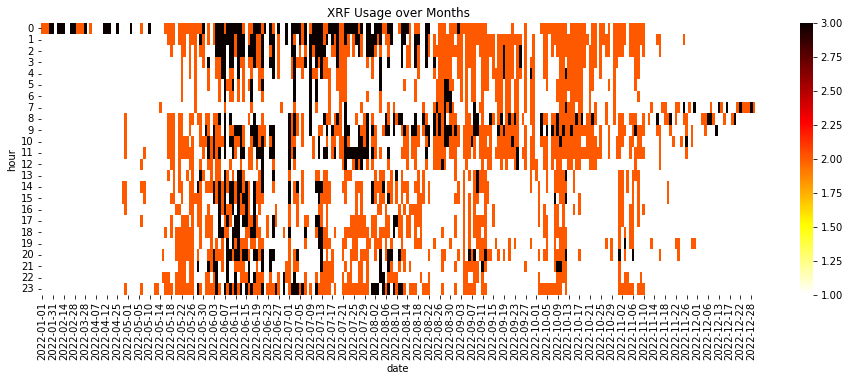

In [225]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_xrf.pivot('hour','date','count'), cmap='hot_r')
plt.title('XRF Usage over Months');

In [229]:
df['month_year'] = df.index.to_period('M')
days_arr = ["Sun","Mon","Tue", "Wed", "Thu", "Fri", "Sat"]
df['day_of_week'] = df['date'].dt.weekday
df.head()

AttributeError: Can only use .dt accessor with datetimelike values

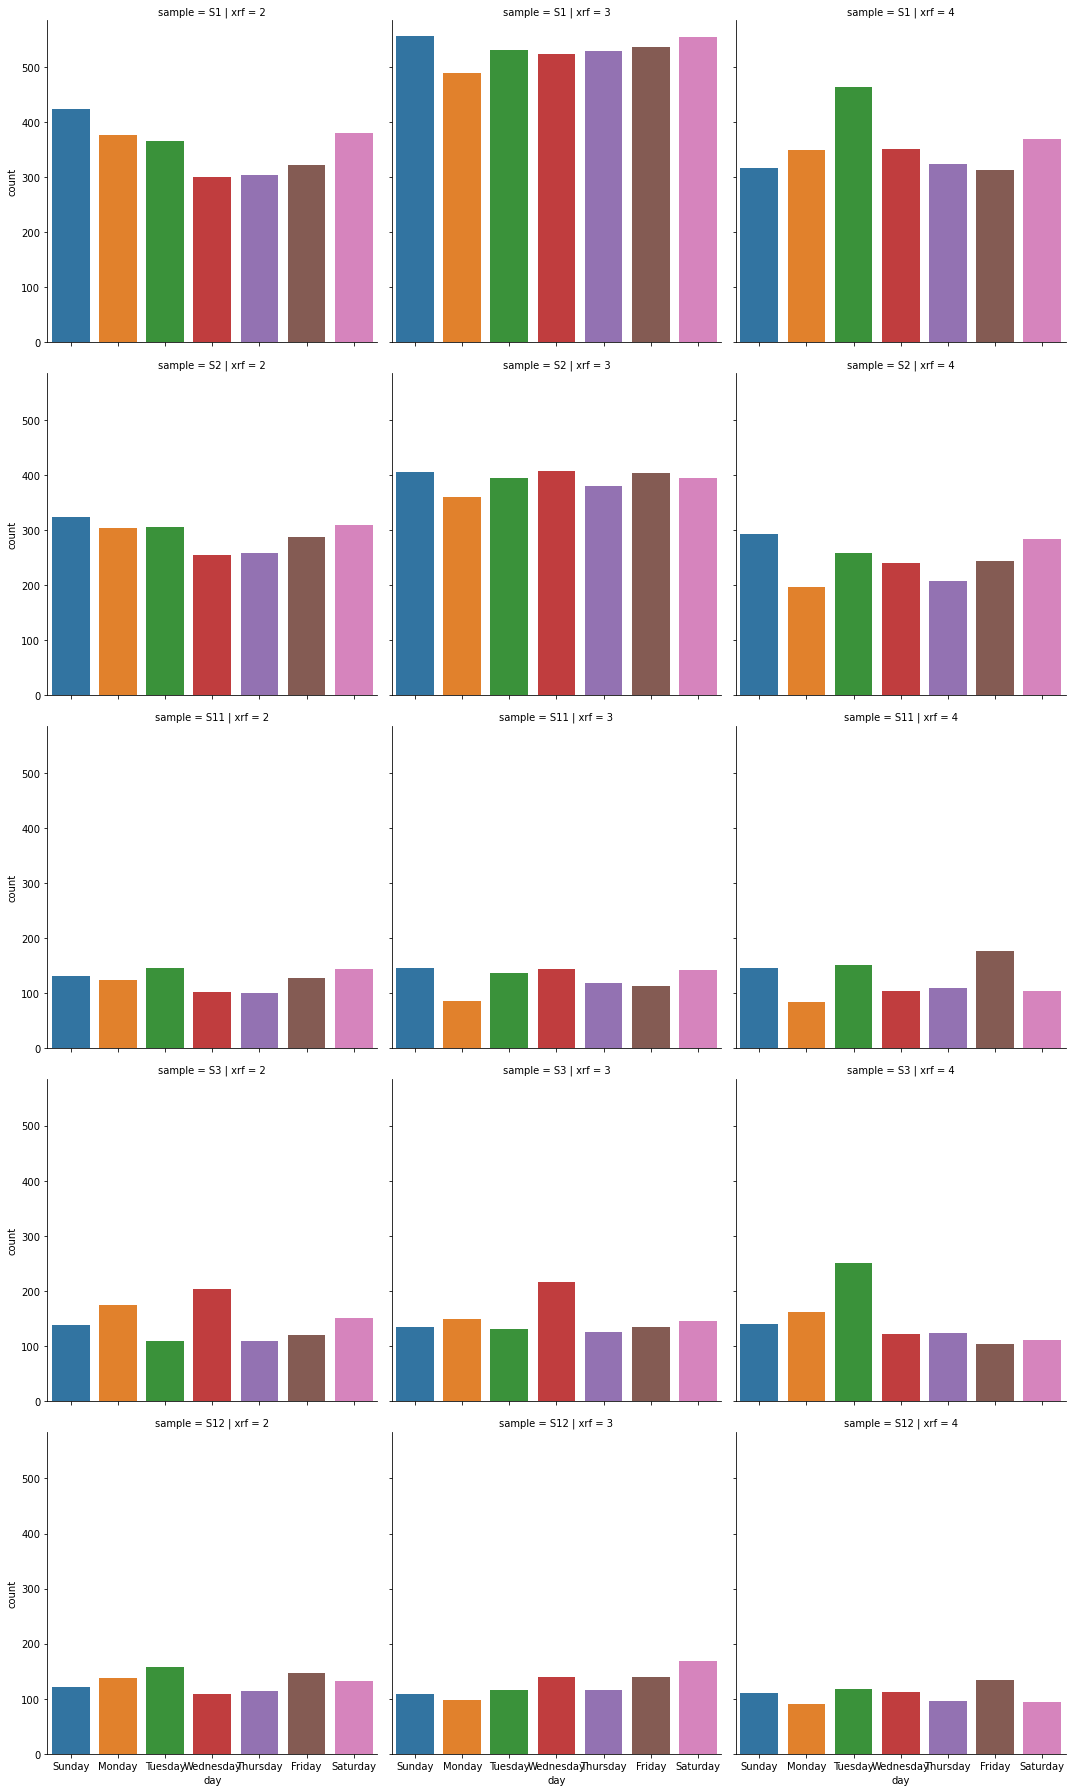

In [153]:
day_order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
sns.catplot(x="day",
           data=new,
           kind="count",
           order=day_order,col="xrf",row="sample")
plt.show()

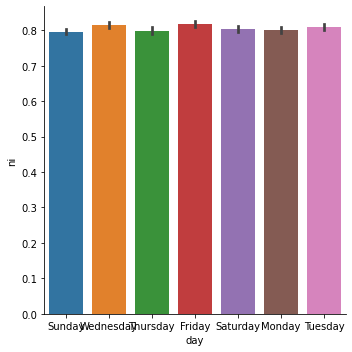

In [151]:

sns.catplot(x="day",
            y="ni",
           data=new,
           kind="bar")
plt.show()

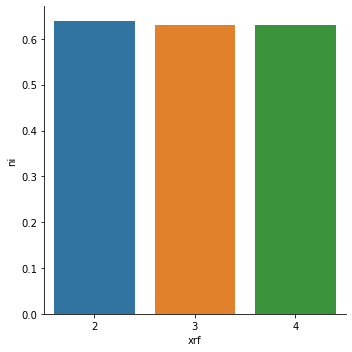

In [143]:
s1=new[new['sample']=="S1"]
sns.catplot(x='xrf',y="ni",data=s1,kind="bar");plt.show()

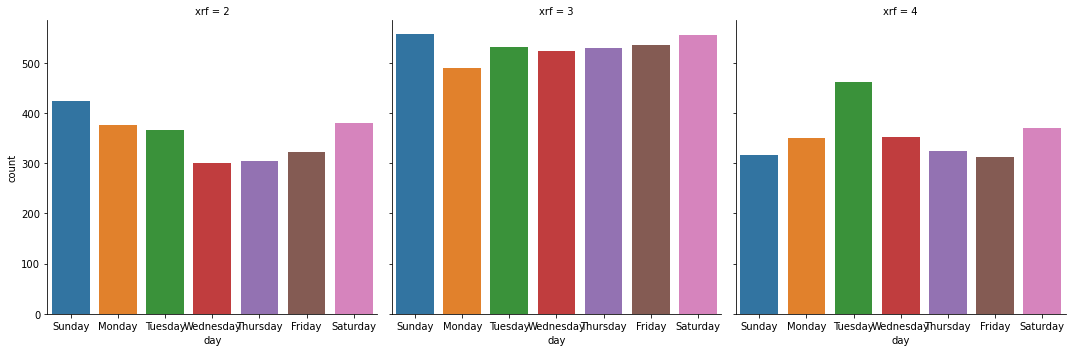

In [147]:
sns.catplot(x="day",
           data=s1,
           kind="count",
           order=day_order,col="xrf")
plt.show()

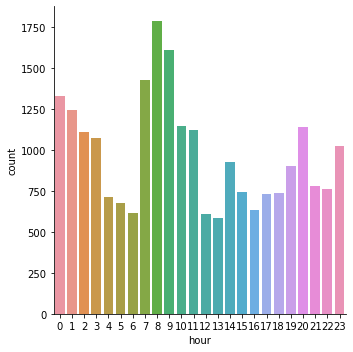

In [128]:
sns.catplot(x="hour",
           data=new,
           kind="count")
plt.show()

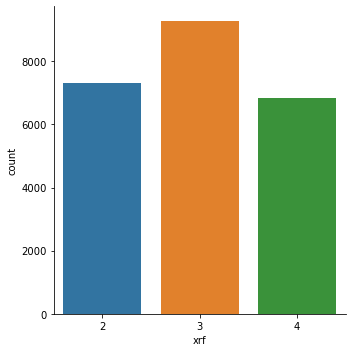

In [130]:
sns.catplot(x="xrf",
           data=new,
           kind="count")
plt.show()

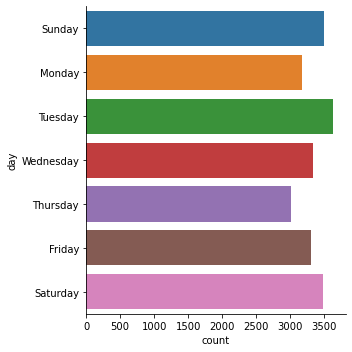

In [131]:
sns.catplot(y="day",
           data=new,
           kind="count",
           order=day_order)

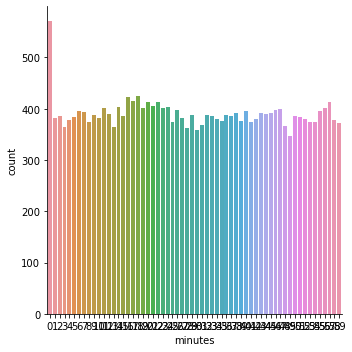

In [129]:
sns.catplot(x="minutes",
           data=new,
           kind="count")
plt.show()

In [104]:
elements = ['ni','fe', 'alu']
crm = new.groupby(['xrf','sample'])[elements].resample('D').mean().dropna(how='all').round(2).reset_index().set_index('dt').sort_index()
'''crm_daily = df.groupby(['xrf','sample'])[elements].resample('D').mean().dropna(how='all').round(3).reset_index().set_index('DT').sort_index()
crm_daily.to_csv("data/daily_crm.csv")'''

'crm_daily = df.groupby([\'xrf\',\'sample\'])[elements].resample(\'D\').mean().dropna(how=\'all\').round(3).reset_index().set_index(\'DT\').sort_index()\ncrm_daily.to_csv("data/daily_crm.csv")'

In [107]:
crm.tail()

,xrf,sample,ni,fe,alu
dt,,,,,
2023-01-06,2,S12,1.38,13.51,1.51
2023-01-06,3,S3,0.96,52.78,3.30
2023-01-06,2,S2,0.68,51.59,6.94
2023-01-06,2,S3,1.04,53.48,3.50
2023-01-06,2,S1,0.66,48.48,10.60


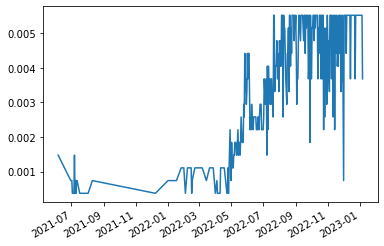

In [120]:
crm.index.value_counts(normalize=True).plot();plt.show()

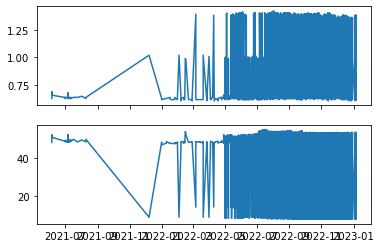

In [113]:

fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(crm.index,crm['ni'])
ax[1].plot(crm.index,crm['fe'])
plt.show()

In [50]:
imp = ["sample",'xrf',"ni","fe","alu","sil","mag"]
crm = df[imp]
#crm["sample"] = crm["sample"].astype('str')
crm.head()

,sample,xrf,ni,fe,alu,sil,mag
DT,,,,,,,
2021-06-06 03:50:24.000,S1,3,0.6344,48.71,10.25,2.032,0.741
2021-06-06 09:21:36.000,S1,3,0.6342,49.41,10.47,2.159,0.854
2021-06-06 14:09:36.000,S1,2,0.6303,48.10,10.17,1.811,1.001
2021-06-06 16:17:36.960,S1,2,0.6191,48.43,10.19,1.816,1.056
2021-06-06 16:19:12.000,S1,2,0.6384,48.03,10.46,1.667,0.923


In [52]:
sample_unique=crm['sample'].unique()
elem = ["ni","fe","alu","sil","mag"]
sample_unique
elem

['ni', 'fe', 'alu', 'sil', 'mag']

In [82]:
new['month_name'].value_counts(normalize=True).plot(kind="bar")

KeyError: 'month_name'

In [106]:
crm['year'].value_counts().plot(kind="bar")

KeyError: 'year'

<AxesSubplot:>

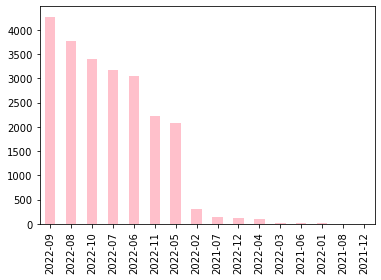

In [55]:
crm['month_year'].value_counts().plot(kind="bar", color='pink')

<AxesSubplot:>

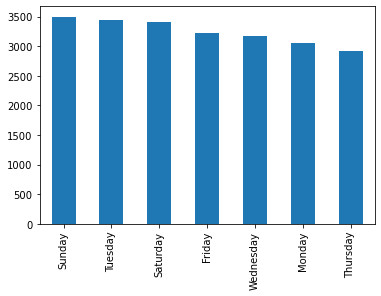

In [56]:
crm['day'].value_counts().plot(kind="bar")

<AxesSubplot:>

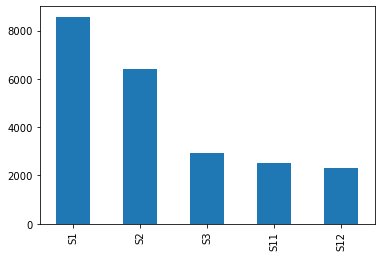

In [57]:
crm['sample'].value_counts().plot(kind="bar")

<AxesSubplot:>

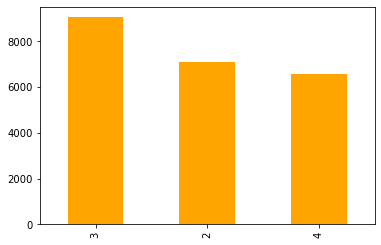

In [58]:
crm['xrf'].value_counts().plot(kind="bar", color="orange")

In [59]:
crm_hourly = crm.groupby(['xrf','sample'])[elem].resample('h').mean().dropna().reset_index()
crm_hourly.set_index('DT', inplace=True)
crm_hourly['time'] = crm_hourly.index.time
crm_hourly['month'] = crm_hourly.index.month_name().str[:3]
crm_hourly['year'] = crm_hourly.index.year
crm_hourly.reset_index()

,DT,xrf,sample,ni,fe,alu,mag,time,month,year
0,2021-06-06 14:00:00,2,S1,0.63030,48.100,10.1700,1.00100,14:00:00,Jun,2021
1,2021-06-06 16:00:00,2,S1,0.62875,48.230,10.3250,0.98950,16:00:00,Jun,2021
2,2021-06-06 21:00:00,2,S1,0.63360,48.290,10.5800,0.95000,21:00:00,Jun,2021
3,2021-06-30 20:00:00,2,S1,0.63620,49.030,10.6300,0.91700,20:00:00,Jun,2021
4,2021-06-30 21:00:00,2,S1,0.63910,48.890,10.6900,0.91100,21:00:00,Jun,2021
...,...,...,...,...,...,...,...,...,...,...
13681,2022-11-28 09:00:00,4,S3,1.00350,52.860,3.4335,1.00545,09:00:00,Nov,2022
13682,2022-11-29 07:00:00,4,S3,0.99695,52.880,3.3620,0.79235,07:00:00,Nov,2022
13683,2022-12-02 09:00:00,4,S3,1.00170,52.980,3.4845,1.00400,09:00:00,Dec,2022
13684,2022-12-03 09:00:00,4,S3,1.00190,52.965,3.5260,1.05050,09:00:00,Dec,2022


In [271]:
crm22 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S1')]
crm22.reset_index(inplace=True)

<AxesSubplot:>

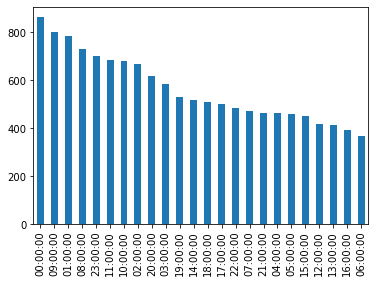

In [44]:
crm_hourly['time'].sort_values().value_counts().plot(kind="bar")

#1.) Daily element trend for different XRFs
#2.) Did Fe trend change with time?


In [273]:
#crm.groupby(["sample","xrf"])[elem].agg([min,max,np.mean,np.median]).round(2)
#crm22.groupby(["sample","xrf"])[elem].median().round(2)
crm22.dtypes

DT        datetime64[ns]
xrf                int64
sample            object
ni               float64
fe               float64
alu              float64
time              object
month             object
year               int64
dtype: object

In [274]:
#exercise from https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

mar30
may27
jul22-
sept2

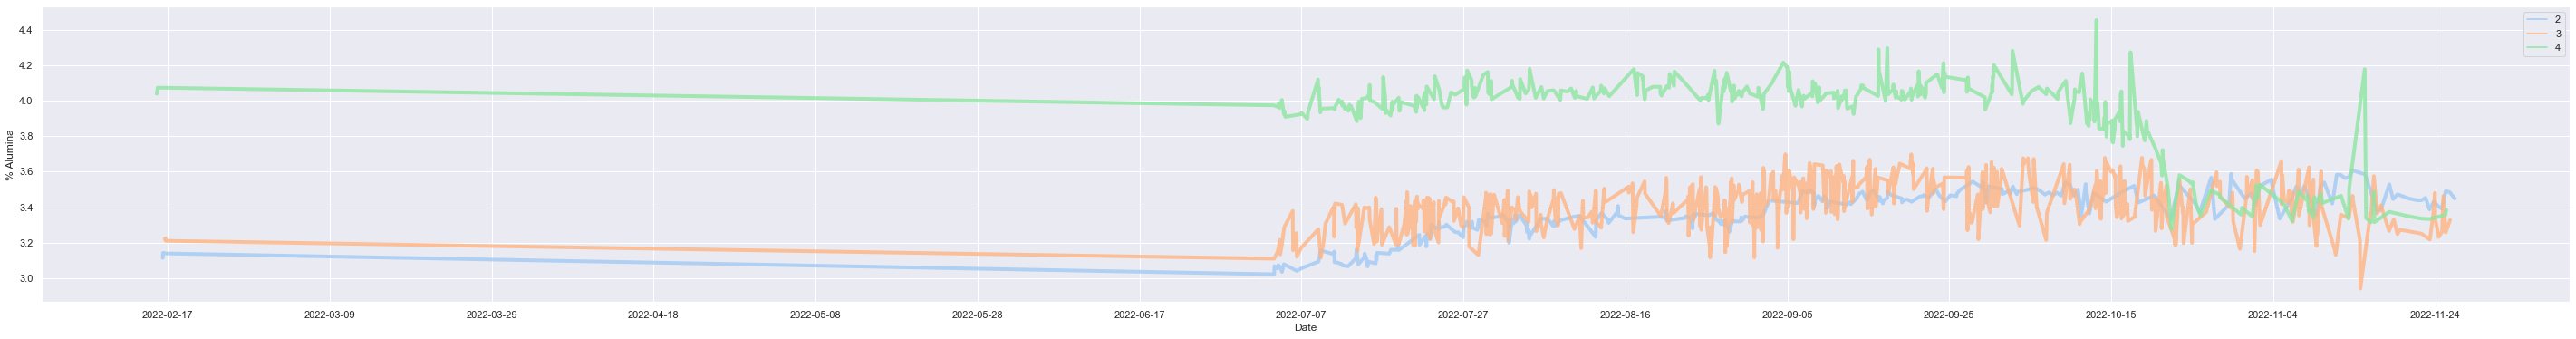

In [282]:
crm22_s3 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S3')]
crm22_s3.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s3, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

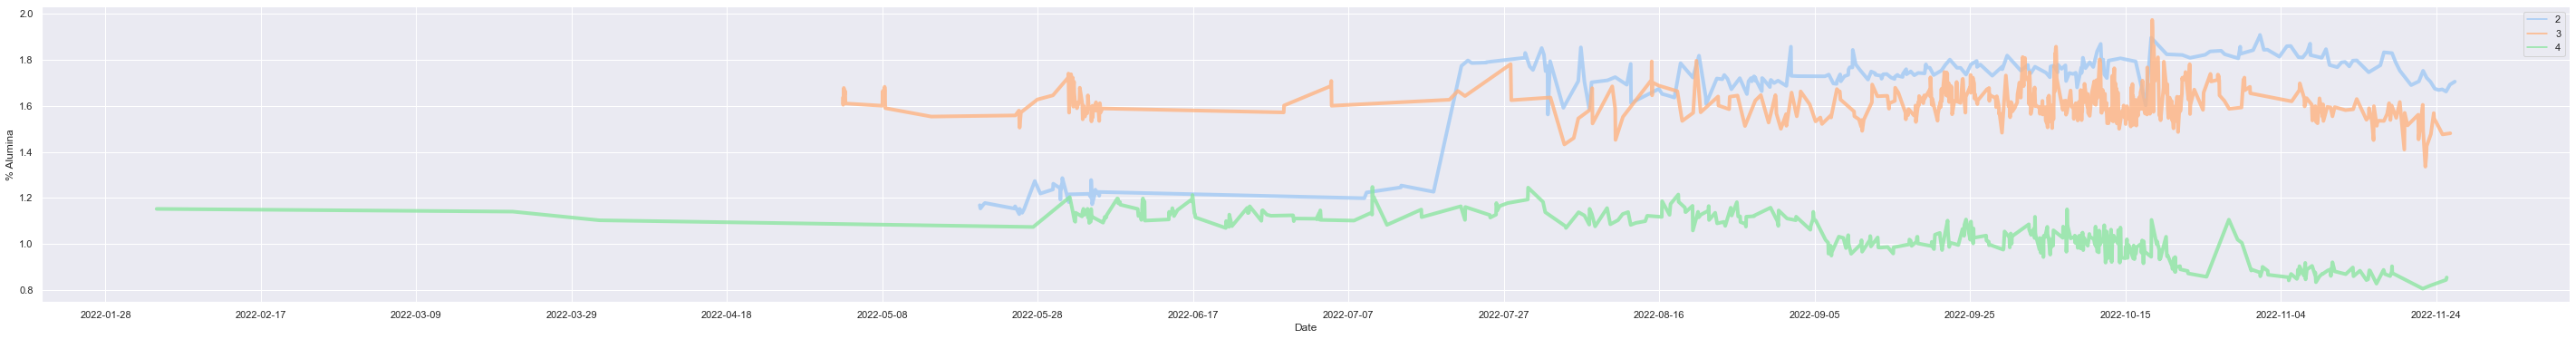

In [283]:
crm22_s11 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S11')]
crm22_s11.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s11, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

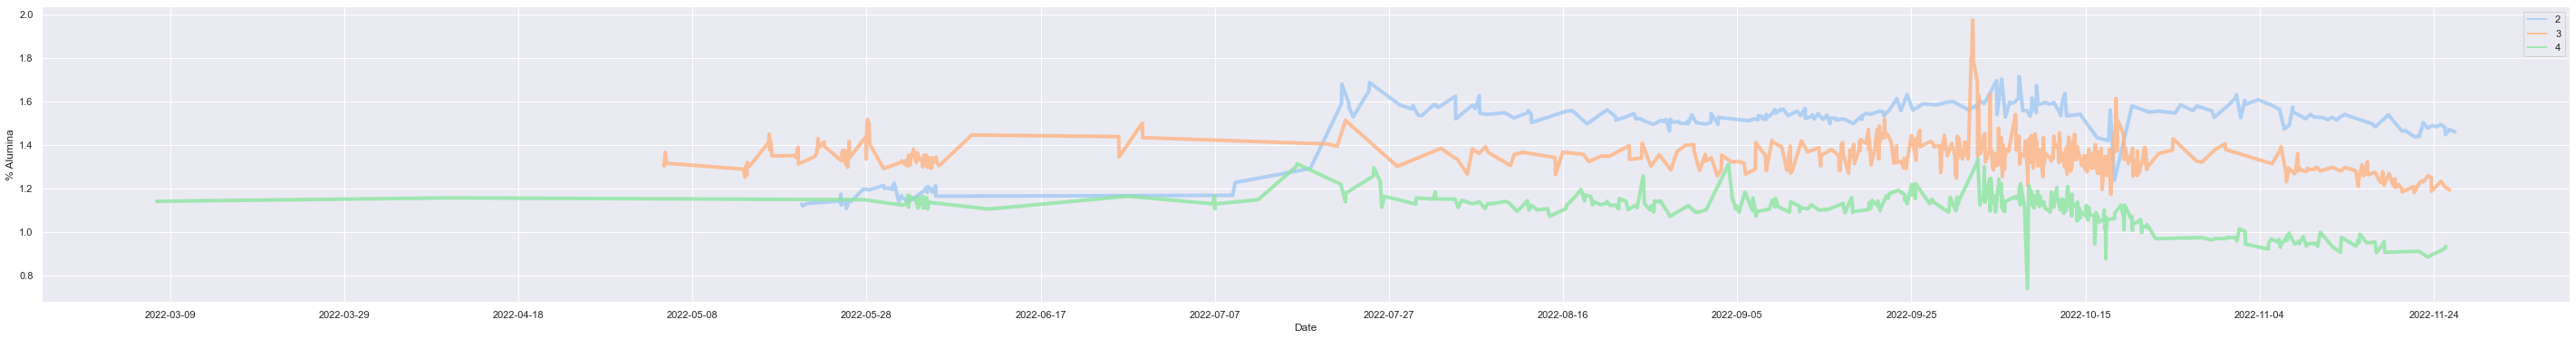

In [284]:
crm22_s12 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S12')]
crm22_s12.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s12, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

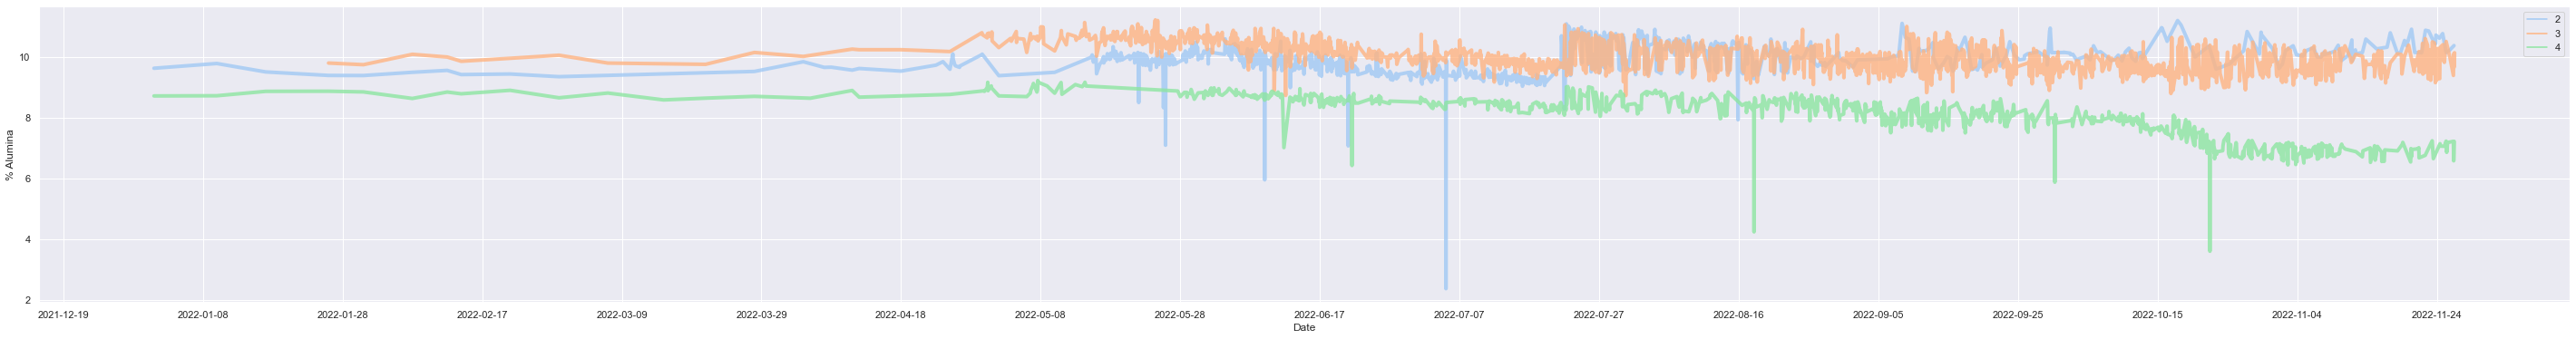

In [294]:
crm22_s1 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S1')]
crm22_s1.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s1, x='DT', y='alu', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Alumina")
plt.xlabel("Date")
plt.show()

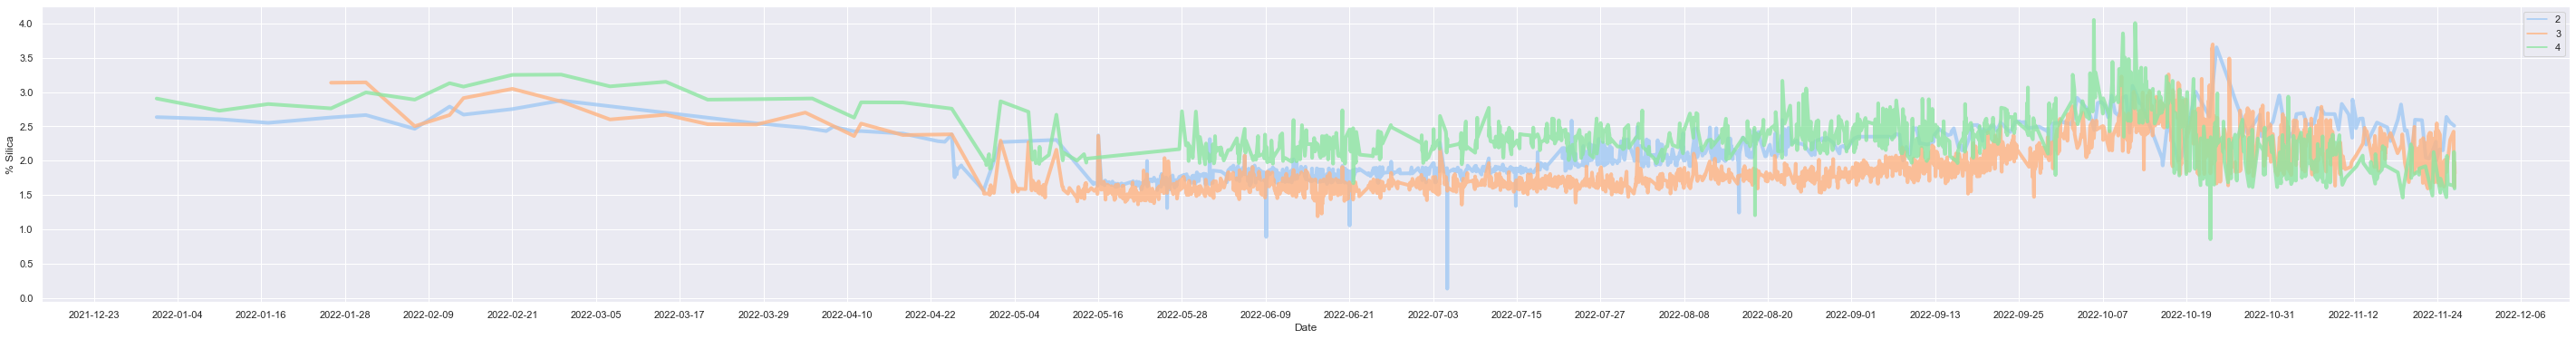

In [296]:
crm22_s1 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S1')]
crm22_s1.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s1, x='DT', y='sil', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Silica")
plt.xlabel("Date")
plt.show()

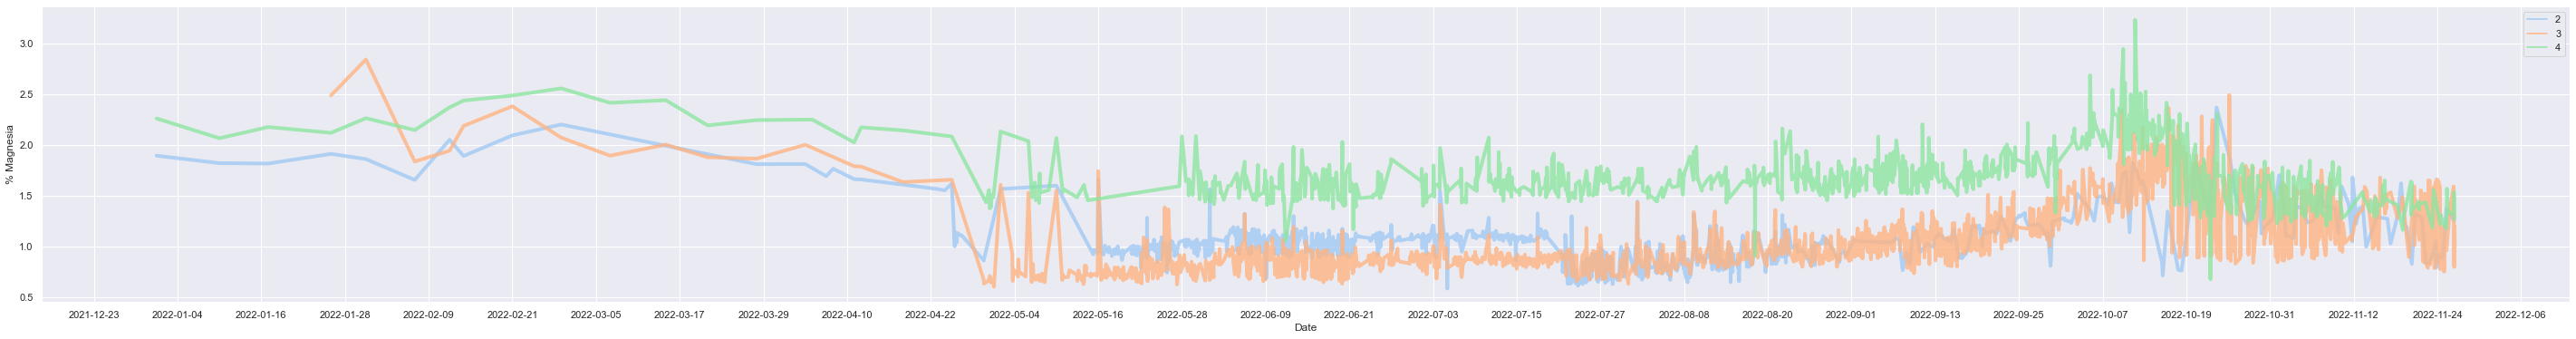

In [298]:
crm22_s1 = crm_hourly[(crm_hourly['year']>2021) & (crm_hourly['sample']=='S1')]
crm22_s1.reset_index(inplace=True)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(50,6)})

ax = sns.lineplot(data=crm22_s1, x='DT', y='mag', hue='xrf',palette='pastel',
               legend='full', lw=4, alpha=0.8)

ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("% Magnesia")
plt.xlabel("Date")
plt.show()

In [315]:
#results in 2022
crm22 = crm[crm.year==2022]
crm22

,sample,xrf,ni,fe,alu,sil,mag,year,month_year,month_name,date,day,time
DT,,,,,,,,,,,,,
2022-01-01 00:00:00,S1,2,0.6279,48.360,9.6310,2.635,1.894,2022,2022-01,Jan,2022-01-01,Saturday,00:00:00
2022-01-01 00:00:00,S1,4,0.6184,46.950,8.7210,2.905,2.260,2022,2022-01,Jan,2022-01-01,Saturday,00:00:00
2022-01-10 00:00:00,S1,2,0.6296,48.720,9.7870,2.605,1.821,2022,2022-01,Jan,2022-01-10,Monday,00:00:00
2022-01-10 00:00:00,S1,4,0.6256,47.860,8.7270,2.728,2.066,2022,2022-01,Jan,2022-01-10,Monday,00:00:00
2022-01-17 00:00:00,S1,2,0.6417,47.670,9.5100,2.552,1.817,2022,2022-01,Jan,2022-01-17,Monday,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25 07:48:00,S11,4,0.9644,7.750,0.8417,32.270,19.120,2022,2022-11,Nov,2022-11-25,Friday,07:48:00
2022-11-25 07:49:00,S11,4,0.9580,7.681,0.8378,32.660,18.820,2022,2022-11,Nov,2022-11-25,Friday,07:49:00
2022-11-25 07:51:00,S11,4,0.9738,7.736,0.8588,34.820,20.700,2022,2022-11,Nov,2022-11-25,Friday,07:51:00


In [47]:
import pandas as pd
import numpy as np
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data/crm.xlsx', parse_dates=['DT'],index_col='DT')
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","xrf", "note"]
#df.info()

imp = ["sample",'xrf',"ni","fe","alu","sil","mag"]
crm = df[imp]

elem = ["ni","fe","alu","sil","mag"]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

daily = pd.read_csv("data/daily_crm.csv", parse_dates=['date'])
daily22 = daily.loc[daily.date>'2021-12-31']

In [18]:
xrfs = daily.xrf.unique().tolist()
samples = daily['sample'].unique().tolist()

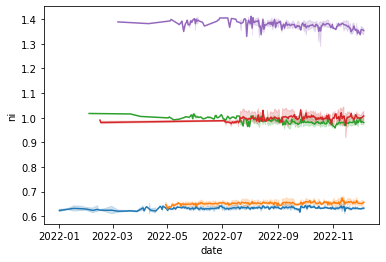

In [39]:
for i in samples:
    i = daily22[daily22['sample']== i]
    sns.lineplot(x=i['date'],y=i['ni'])

Text(0, 0.5, '% Fe')

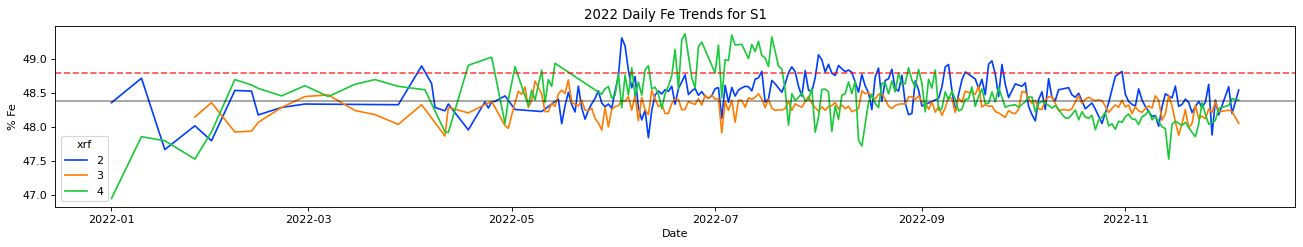

In [81]:
s1 =daily22[daily22['sample']== 'S1']

plt.figure(figsize=(20, 3), dpi=80)
ax = sns.lineplot(data=s1 ,x='date', y='fe', hue='xrf', palette='bright',lw=1.5,ls='-')

# Highlight true value
ax.axhline(48.80, color='r', alpha=0.7, label='true value',ls='--')

# Highlight median
ax.axhline(s1['fe'].median(), color='black', label = "median Fe", alpha=0.4)

plt.title("2022 Daily Fe Trends for S1")
plt.xlabel("Date")
plt.ylabel("% Fe")

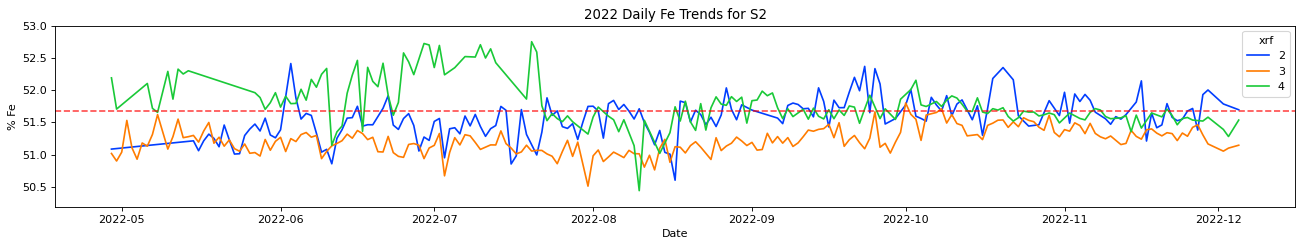

In [80]:
s2 =daily22[daily22['sample']== 'S2']

plt.figure(figsize=(20, 3), dpi=80)
ax = sns.lineplot(data=s2 ,x='date', y='fe', hue='xrf', palette='bright',lw=1.5,ls='-')

# Highlight true value
ax.axhline(51.68, color='r', alpha=0.7, label='true value',ls='--')

# Highlight median
#ax.axhline(s2['fe'].median(), color='black', label = "median Fe", alpha=0.4)
ax.set_ylim(s2['fe'].min()-0.25,s2['fe'].max()+0.25)

plt.title("2022 Daily Fe Trends for S2")
plt.xlabel("Date")
plt.ylabel("% Fe")

plt.show()

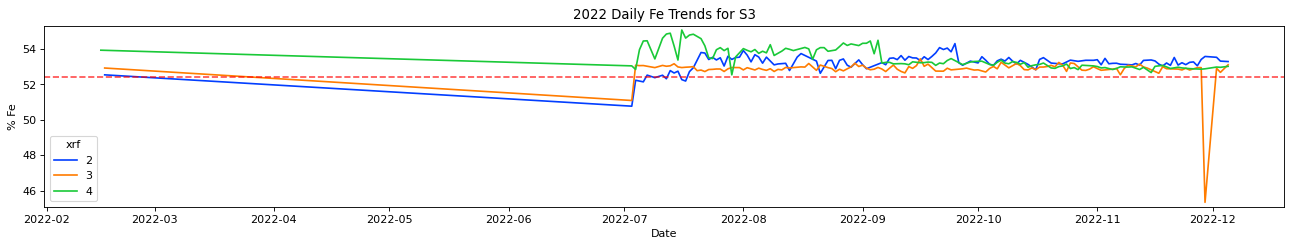

In [82]:
s3 =daily22[daily22['sample']== 'S3']

plt.figure(figsize=(20, 3), dpi=80)
ax = sns.lineplot(data=s3 ,x='date', y='fe', hue='xrf', palette='bright',lw=1.5,ls='-')

# Highlight true value
ax.axhline(52.43, color='r', alpha=0.7, label='true value',ls='--')

# Highlight median
#ax.axhline(s2['fe'].median(), color='black', label = "median Fe", alpha=0.4)
ax.set_ylim(s3['fe'].min()-0.25,s3['fe'].max()+0.25)

plt.title("2022 Daily Fe Trends for S3")
plt.xlabel("Date")
plt.ylabel("% Fe")

plt.show()

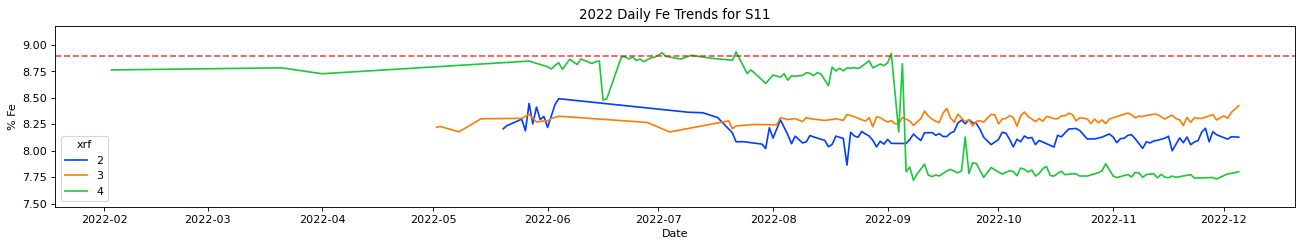

In [83]:
s11 =daily22[daily22['sample']== 'S11']

plt.figure(figsize=(20, 3), dpi=80)
ax = sns.lineplot(data=s11 ,x='date', y='fe', hue='xrf', palette='bright',lw=1.5,ls='-')

# Highlight true value
ax.axhline(8.9, color='r', alpha=0.7, label='true value',ls='--')

# Highlight median
#ax.axhline(s2['fe'].median(), color='black', label = "median Fe", alpha=0.4)
ax.set_ylim(s11['fe'].min()-0.25,s11['fe'].max()+0.25)

plt.title("2022 Daily Fe Trends for S11")
plt.xlabel("Date")
plt.ylabel("% Fe")

plt.show()

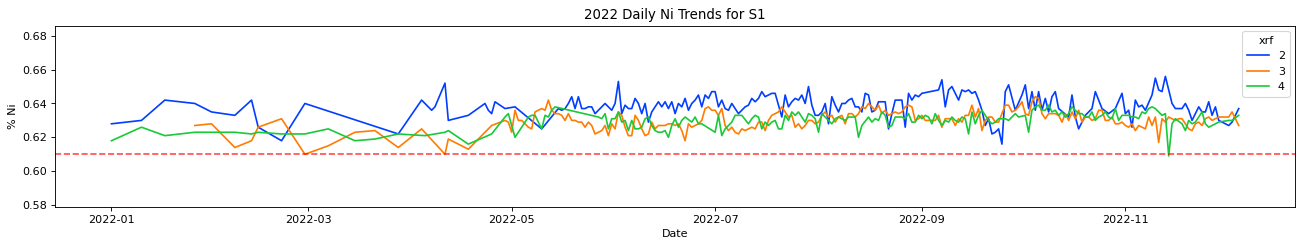

In [85]:
plt.figure(figsize=(20, 3), dpi=80)
ax = sns.lineplot(data=s1 ,x='date', y='ni', hue='xrf', palette='bright',lw=1.5,ls='-')

# Highlight true value
ax.axhline(0.61, color='r', alpha=0.7, label='true value',ls='--')

# Highlight median
#ax.axhline(s2['fe'].median(), color='black', label = "median Fe", alpha=0.4)
ax.set_ylim(s1['ni'].min()-0.03,s1['ni'].max()+0.03)

plt.title("2022 Daily Ni Trends for S1")
plt.xlabel("Date")
plt.ylabel("% Ni")

plt.show()

In [2]:
df =pd.read_excel('data/crm.xlsx')

In [3]:
df.head()

,SampleName,Ni,Fe,Co,Al2O3,SiO2,P,S,MgO,CaO,Cr2O3,MnO,TiO2,DT,XRF
0,S1,0.6344,48.71,0.0981,10.25,2.032,< 0.0012,0.1668,0.741,NaN,NaN,NaN,NaN,2021-06-06 03:50:24,3
1,S1,0.6342,49.41,0.1048,10.47,2.159,< 0.0012,0.1652,0.854,NaN,NaN,NaN,NaN,2021-06-06 09:21:36,3
2,S1,0.6303,48.10,0.107,10.17,1.811,0.00949,0.1613,1.001,NaN,NaN,NaN,NaN,2021-06-06 14:09:36,2
3,S1,0.6191,48.43,0.12,10.19,1.816,0.00955,0.1634,1.056,NaN,NaN,NaN,NaN,2021-06-06 16:17:36.960000,2
4,S1,0.6384,48.03,0.112,10.46,1.667,0.00754,0.1667,0.923,NaN,NaN,NaN,NaN,2021-06-06 16:19:12,2


In [6]:
daily = pd.read_csv("data/daily_crm.csv", parse_dates=['date'])
day = daily.loc[daily.date>'2021-12-31']

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 32 to 2401
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2370 non-null   datetime64[ns]
 1   xrf     2370 non-null   int64         
 2   sample  2370 non-null   object        
 3   ni      2370 non-null   float64       
 4   fe      2370 non-null   float64       
 5   alu     2370 non-null   float64       
 6   mag     2370 non-null   float64       
 7   chrom   2370 non-null   float64       
 8   man     2370 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 185.2+ KB


In [2]:
import pandas as pd
xls = pd.ExcelFile('data/crm.xlsx')

In [4]:
df1 = xls.parse(0)

(23430, 15)